# **Lab 11: Equilibrium surface temperatures for airless planets**

In [2]:
from pylab import *

Consider a planet orbiting a star. Its surface temperature can be calculated
starting with the assumption that the energy received by the star is equal to
the energy emitted by the planet (per unit time). For simplicity, we also assume
that the planet rotates very slowly and does not have an atmosphere.

The amount of energy absorbed per unit surface area depends on the latitude
$\theta$, which can be visualized using the diagram below.

<img src="lab11.jpg" alt="diagram" width="200" class="center"/>

The resulting noon-time equilibrium surface temperature can be shown to be:

$$ 
T_s = 279\degree K \left[ \displaystyle\frac{L(1 - A) \cos\theta}{\epsilon r^2} \right]^{1/4},
$$

where $L$ is the intrinsic luminosity of the star in Solar units, $A$ is the albedo (the
fraction of light reﬂected), $\epsilon$ is the emissivity of the surface (as a fraction), and $r$
is the distance from the star to the planet in “astronomical units” (AU), where
the distance from the Sun to the Earth is 1 AU. This temperature in Kelvins
can be converted to Fahrenheit degrees using the formula:

$$
T[\degree F] = \displaystyle\frac 9 5 (T[\degree K] - 273.15\degree K) + 32\degree F
$$


In [7]:
# convert from Kelvin to Fahrenheit (helper function)
def KtoF(K):
    return (9/5)*(K-273.15)+32

# convert from Fahrenheit to Kelvin (helper function)
def FtoK(F):
    return (5/9)*(F-32)+273.15

# surface temperature in Kelvin of a planet with 
# luminosity L, albedo A, emissivity e, distance r from the sun, and latitude theta
def surfaceTemp(L, A, e, r, theta):
    return 279*((L*(1-A)*cos(radians(theta))/e*r**2)**(1/4))

# function for later in lab, solved for theta
def latitude(L, A, e, r, T):
    return degrees(arccos(((T/279)**4)*(e*r**2/(L*(1-A)))))

temp = KtoF(surfaceTemp(1, .3, .95, 1, 0))
# test the function
assert around(temp, decimals=4) == 5.6164, f"surfaceTemp function Failed\nResult: {around(temp, decimals=4)}\nExpected: 5.6164"


In [33]:
L = float(input("Enter the luminosity of the star in solar units: "))
A = float(input("Enter the albedo of the planet: "))
e = float(input("Enter the emissivity of the planet: "))
r = float(input("Enter the distance of the planet from the star in AU: "))
theta = float(input("Enter the latitude of the planet in degrees: "))

temp = KtoF(surfaceTemp(L, A, e, r, theta))

print(f'Intrinsic Luminosity: {L} solar units')
print(f'Albedo: {A}')
print(f'Emissivity: {e}')
print(f'Distance from the star: {r} AU')
print(f'Latitude: {theta} degrees')
print(f"The surface temperature of the planet is {temp:.2f} degrees Fahrenheit")



Intrinsic Luminosity: 1.0 solar units
Albedo: 0.3
Emissivity: 1.0
Distance from the star: 1.0 AU
Latitude: 0.0 degrees
The surface temperature of the planet is -0.31 degrees Fahrenheit


#### Assume a planet–star system like the Earth–Sun ($L = 1$, $r = 1$), with $A = 0.30$, $\epsilon = 0.95$. What is the temperature at the equator at noon? How does this compare to actual temperatures on the Earth, and why do you think it differs? 

In [65]:
L = 1
A = 0.3
e = 0.95
r = 1
theta = 0

temp = KtoF(surfaceTemp(L, A, e, r, theta))

print(f'Intrinsic Luminosity: {L} solar units')
print(f'Albedo: {A}')
print(f'Emissivity: {e}')
print(f'Distance from the star: {r} AU')
print(f'Latitude: {theta} degrees')
print(f'The surface temperature of the planet is {temp:.2f} degrees Fahrenheit')


Intrinsic Luminosity: 1 solar units
Albedo: 0.3
Emissivity: 0.95
Distance from the star: 1 AU
Latitude: 0 degrees
The surface temperature of the planet is 5.62 degrees Fahrenheit


This result is a lot lower than the typical equator temperature around noon on Earth which (with $-15\degree <= \theta_{lat} <= 15\degree$) [averages to $64\degree F$](https://sciencing.com/hot-equator-but-cold-poles-6908312.html)

This is probably due to our model having virtually no rotation and thus no atmosphere. [The atmosphere plays a crucial role in determining climate and the presence of greenhouse gases warm the Earth.](https://www.visionlearning.com/en/library/Earth-Science/6/Factors-that-Control-Earths-Temperature/234) 

#### Consider also the Moon with A= 0.11, ϵ= 0.90: what is the temperature?

In [66]:
A = 0.11 
e = 0.90 

temp = KtoF(surfaceTemp(L, A, e, r, theta))

print(f'Intrinsic Luminosity: {L} solar units')
print(f'Albedo: {A}')
print(f'Emissivity: {e}')
print(f'Distance from the star: {r} AU')
print(f'Latitude: {theta} degrees')
print(f'The surface temperature of the planet is {temp:.2f} degrees Fahrenheit')

Intrinsic Luminosity: 1 solar units
Albedo: 0.11
Emissivity: 0.9
Distance from the star: 1 AU
Latitude: 0 degrees
The surface temperature of the planet is 41.13 degrees Fahrenheit


#### Now consider a brighter star, with $L= 2$. What is the noon temperature at the equator for the “Moon”? At what latitude is the temperature equal to $32\degree F$?

In [67]:
L = 2
targetTemp = 32

temp = KtoF(surfaceTemp(L, A, e, r, theta))

print(f'Intrinsic Luminosity: {L} solar units')
print(f'Albedo: {A}')
print(f'Emissivity: {e}')
print(f'Distance from the star: {r} AU')
print(f'Latitude: {theta} degrees')
print(f'The surface temperature of the planet is {temp:.2f} degrees Fahrenheit')

# convert from Fahrenheit to Kelvin
T = FtoK(targetTemp)

theta = latitude(L, A, e, r, T)

print(f'The latitude that would achieve {targetTemp:} degrees Fahrenheit surface temperature is {theta:.2f} degrees')








Intrinsic Luminosity: 2 solar units
Albedo: 0.11
Emissivity: 0.9
Distance from the star: 1 AU
Latitude: 0 degrees
The surface temperature of the planet is 135.88 degrees Fahrenheit
The latitude that would achieve 32 degrees Fahrenheit surface temperature is 62.32 degrees


#### **Experiment** with diﬀerent values for albedo and emissivity, and discuss their relative eﬀects on temperature.

In [94]:
# keep albedo constant, vary emissivity
emissivity = arange(0.1, 1.1, 0.1)
albedo = 0.3

T1 = [KtoF(surfaceTemp(1, albedo, e, 1, 0)) for e in emissivity]
T1 = array(T1)
T1std = std(T1)

for idx, temp in enumerate(T1):
    print(f'Emissivity: {emissivity[idx]:.2f}, Temperature: {temp:.2f}')

print()
# keep emissivity constant, vary albedo
albedo = arange(0.1, 1.1, 0.1)
emissivity = 1 #blackbody

T2 = [KtoF(surfaceTemp(1, A, emissivity, 1, 0)) for A in albedo]
T2 = array(T2)
T2std = std(T2)

for idx, temp in enumerate(T2):
    print(f'Albedo: {albedo[idx]:.2f}, Temperature: {temp:.2f}')

Emissivity: 0.10, Temperature: 357.20
Emissivity: 0.20, Temperature: 227.23
Emissivity: 0.30, Temperature: 161.01
Emissivity: 0.40, Temperature: 117.94
Emissivity: 0.50, Temperature: 86.60
Emissivity: 0.60, Temperature: 62.26
Emissivity: 0.70, Temperature: 42.53
Emissivity: 0.80, Temperature: 26.04
Emissivity: 0.90, Temperature: 11.95
Emissivity: 1.00, Temperature: -0.31

Albedo: 0.10, Temperature: 29.47
Albedo: 0.20, Temperature: 15.28
Albedo: 0.30, Temperature: -0.31
Albedo: 0.40, Temperature: -17.68
Albedo: 0.50, Temperature: -37.37
Albedo: 0.60, Temperature: -60.29
Albedo: 0.70, Temperature: -88.00
Albedo: 0.80, Temperature: -123.83
Albedo: 0.90, Temperature: -177.26
Albedo: 1.00, Temperature: -459.67


It seems as there is an inverse relationship between emissivity and temp as well as albedo and temp. The relationship between emissivity makes sense because of Stefan-Boltzmann Law 

$$
P = \sigma A \epsilon T^4
$$

where P is the power radiated, A is the area of the object, e is the emissivity, and T is the absolute temperature 

This tells us that 

$$
T \propto \frac{1}{e^{1/4}}
$$

which is also the relationship between $T$ and $\epsilon$ in the given equation

The relationship between albedo and temp also makes sense since if albedo is the fraction of light reflected, a higher value would mean more light reflected and less light absorbed. Theoretically, if we could get complete reflection of light (and ignore entropy) we could get absolute 0 and we see that with albedo value 1, this leads us to $-459.67\degree F$ which is absolute 0.

#### Make a plot to examine the dependence of Ts on other parameters. Show the curve of $T_s$ versus $param_i$ for at least two parameters, on the same plot. Use appropriate plot decorations such as a legend and axis labels with units.

/var/folders/24/ggylxxcj3xq362xbyt3gkg_00000gn/T/ipykernel_56238/2251094517.py:12: RuntimeWarning: invalid value encountered in scalar power
  return 279*((L*(1-A)*cos(radians(theta))/e*r**2)**(1/4))


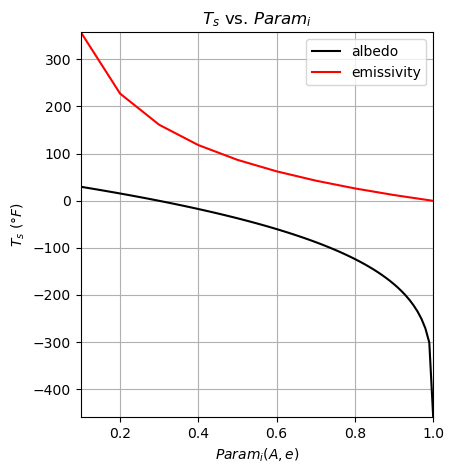

In [38]:
fig = figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)

# title
title('$T_s$ vs. $Param_i$')
#labels
xlabel('$Param_i (A, e)$')
ylabel('$T_s$ ($\\degree F$)')   

# keep emissivity constant, vary albedo
albedo = arange(0.1, 1.1, 0.01)
emissivity = 1 #blackbody

T2 = [KtoF(surfaceTemp(1, A, emissivity, 1, 0)) for A in albedo]
T2 = array(T2)
T2std = std(T2)

plot(albedo, T2, 'k-', label='albedo',)

# keep albedo constant, vary emissivity
emissivity = arange(0.1, 1.1, 0.1)
albedo = 0.3

T1 = [KtoF(surfaceTemp(1, albedo, e, 1, 0)) for e in emissivity]
T1 = array(T1)
T1std = std(T1)

plot(emissivity, T1, 'r-', label='emissivity',)

grid()
autoscale(tight=True)
legend(loc='upper right')
